In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import reverse_geocode 
import plotly.express as px
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small',
          'lines.linewidth' : 1.6}
plt.rcParams.update(params)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.shape

(12043, 23)

In [4]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
df.drop(['bpay_biller_code', 'merchant_code'],axis = 1, inplace=True)

In [8]:
df.isna().sum()

status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [9]:
df.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [10]:
df.dtypes

status                       object
card_present_flag           float64
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [11]:
df['long'], df['lat'] = df.long_lat.str.split(' ',1).str
df.drop('long_lat', axis = 1, inplace = True)

<ipython-input-11-751ede85ede4>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['long'], df['lat'] = df.long_lat.str.split(' ',1).str


In [12]:
# convert to float
df['long']  = df['long'].astype('float')
df['lat'] = df['lat'].astype('float')

In [13]:
df.head()

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat
0,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95
2,authorized,1.0,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94
3,authorized,1.0,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66
4,authorized,1.0,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95


## Exploratory Data Analysis

In [14]:
df.describe()

,card_present_flag,balance,age,amount,long,lat
count,7717.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588,143.648563,-38.164347
std,0.398029,31503.722652,10.046343,592.599934,16.669352,54.622791
min,0.000000,0.240000,18.000000,0.100000,114.620000,-573.000000
25%,1.000000,3158.585000,22.000000,16.000000,138.690000,-37.700000
50%,1.000000,6432.010000,28.000000,29.000000,145.230000,-33.890000
75%,1.000000,12465.945000,38.000000,53.655000,151.220000,-30.750000
max,1.000000,267128.520000,78.000000,8835.980000,255.000000,-12.370000


#### Average balance is 14704.195553
#### Average amount is 187.933588
#### Average age of customers 30.58

## AGE

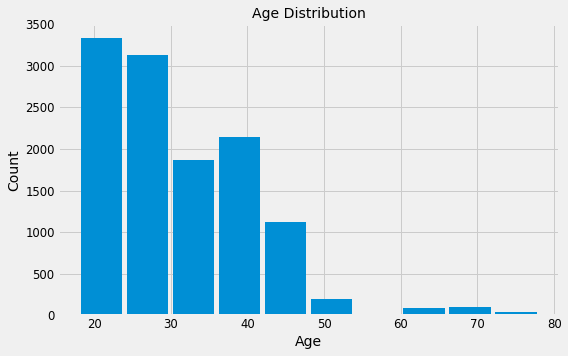

In [15]:
df.age.hist(rwidth=0.9)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count");

In [16]:
df['binned_age'] = pd.cut(df.age, bins = [0,20,40,60,80]).astype('str')

In [17]:
df.binned_age.value_counts(normalize = True)*100

(20, 40]    70.381134
(0, 20]     15.776800
(40, 60]    11.982064
(60, 80]     1.860002
Name: binned_age, dtype: float64

In [18]:
df.binned_age.value_counts()

(20, 40]    8476
(0, 20]     1900
(40, 60]    1443
(60, 80]     224
Name: binned_age, dtype: int64

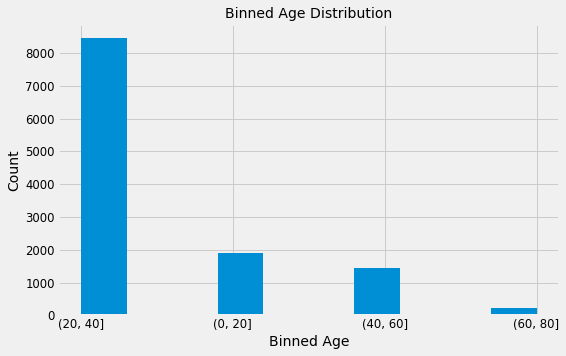

In [19]:
df.binned_age.hist()
plt.title("Binned Age Distribution")
plt.xlabel("Binned Age")
plt.ylabel("Count");

## Amount

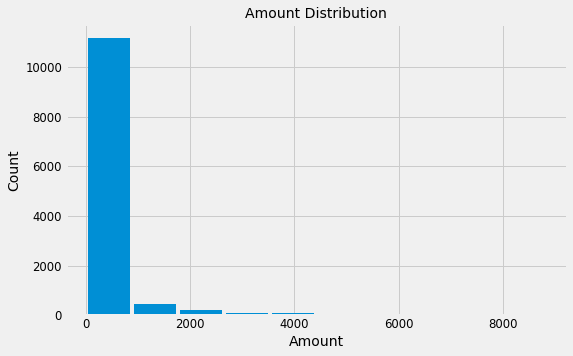

In [20]:
df.amount.hist(rwidth=0.9)
plt.title("Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count");

Text(0, 0.5, 'Average amount')

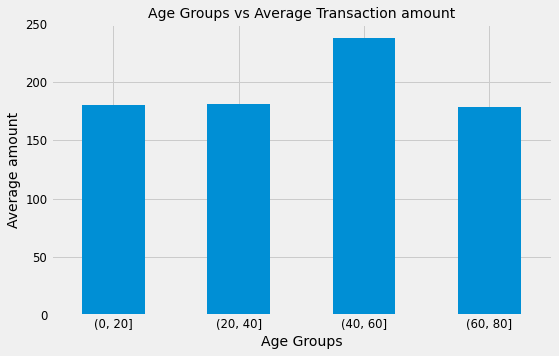

In [21]:
df.groupby('binned_age').amount.mean().plot(kind = 'bar')
plt.title("Age Groups vs Average Transaction amount")
plt.xticks(rotation = 0)
plt.xlabel("Age Groups")
plt.ylabel("Average amount")

#### Average amount of transaction in age group 40-60 is higher than all other groups
#### People from 40-60 spend more money than others

# Balance

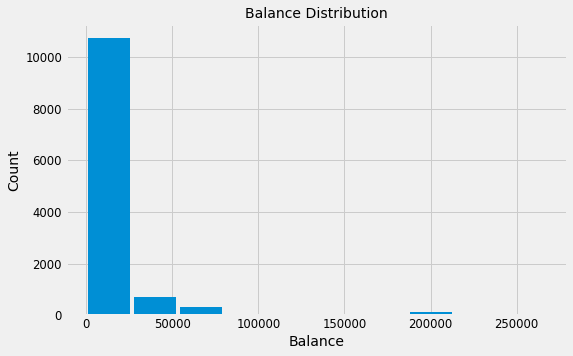

In [22]:
df.balance.hist(rwidth=0.9)
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Count");

Text(0, 0.5, 'Average Balance')

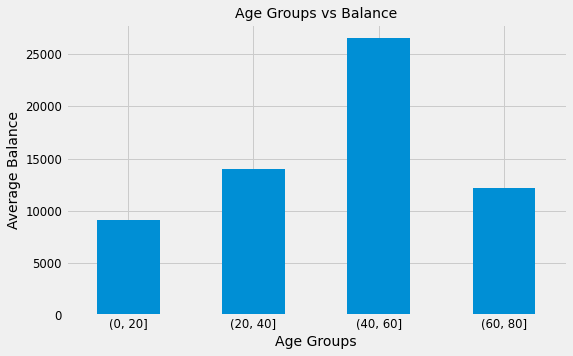

In [23]:
df.groupby('binned_age').balance.mean().plot(kind = 'bar')
plt.title("Age Groups vs Balance")
plt.xticks(rotation = 0)
plt.xlabel("Age Groups")
plt.ylabel("Average Balance")

#### Average balance in age group 40-60 is higher than all other groups similar to amount

## Movement

In [24]:
df.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [25]:
df.movement.value_counts(normalize = True)*100

debit     92.66794
credit     7.33206
Name: movement, dtype: float64

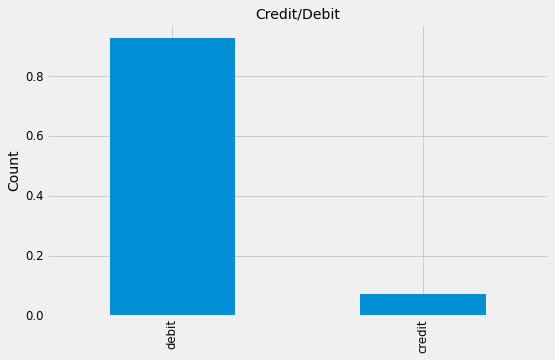

In [26]:
df.movement.value_counts(normalize=True).plot(kind='bar')
plt.title("Credit/Debit")
plt.ylabel("Count");

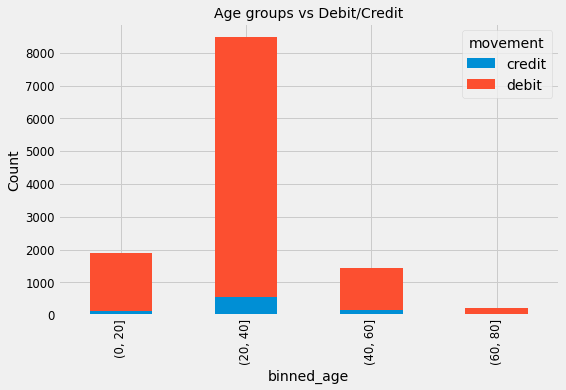

In [27]:
df.groupby(['binned_age', 'movement']).movement.count().unstack().plot(kind = 'bar', stacked = True)
plt.title("Age groups vs Debit/Credit")
plt.ylabel("Count");

## Card Present

In [28]:
df.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [29]:
df.card_present_flag.value_counts(normalize = True)*100

1.0    80.264351
0.0    19.735649
Name: card_present_flag, dtype: float64

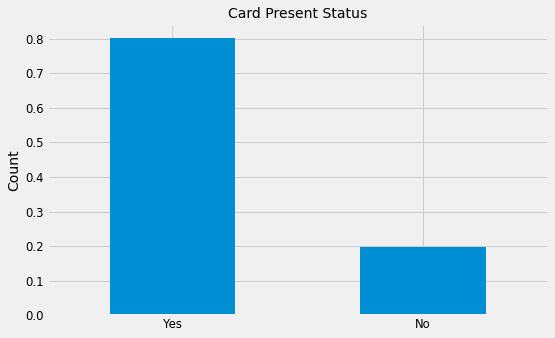

In [30]:
df.card_present_flag.value_counts(normalize=True).plot(kind='bar')
plt.title("Card Present Status")
plt.xticks(np.arange(2), ['Yes', 'No'], rotation = 0)
plt.ylabel("Count");

# Gender

In [31]:
df.gender.value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [32]:
df.gender.value_counts(normalize = True)*100

M    52.187993
F    47.812007
Name: gender, dtype: float64

In [33]:
df.groupby('gender').amount.mean()

gender
F    168.517303
M    205.721809
Name: amount, dtype: float64

Text(0, 0.5, 'Average amount')

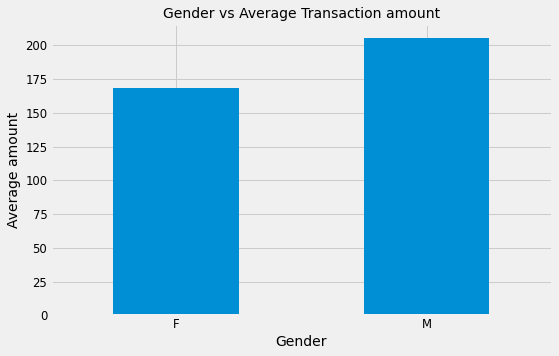

In [34]:
df.groupby('gender').amount.mean().plot(kind = 'bar')
plt.title("Gender vs Average Transaction amount")
plt.xticks(rotation = 0)
plt.xlabel("Gender")
plt.ylabel("Average amount")

### On Average Men spend more money than women 

Text(0, 0.5, 'Average balance')

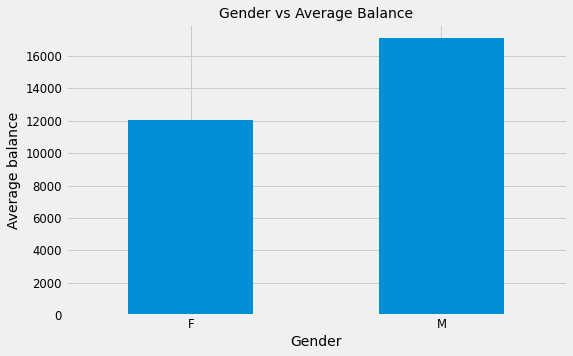

In [35]:
df.groupby('gender').balance.mean().plot(kind = 'bar')
plt.title("Gender vs Average Balance")
plt.xticks(rotation = 0)
plt.xlabel("Gender")
plt.ylabel("Average balance")

###  Men have more balance than women

# Date

In [36]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['day_of_week'] = df.date.dt.strftime('%A')

In [80]:
df.date.value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [85]:
df.groupby(['date', 'day_of_week']).date.count()

date        day_of_week
2018-08-01  Wednesday      137
2018-08-02  Thursday       152
2018-08-03  Friday         157
2018-08-04  Saturday       118
2018-08-05  Sunday         100
                          ... 
2018-10-27  Saturday       139
2018-10-28  Sunday         143
2018-10-29  Monday         102
2018-10-30  Tuesday         89
2018-10-31  Wednesday      141
Name: date, Length: 91, dtype: int64

### Date with Amount

In [37]:
df.groupby('month').amount.mean()

month
8     185.121867
9     182.045903
10    196.427323
Name: amount, dtype: float64

Text(0, 0.5, 'Average amount')

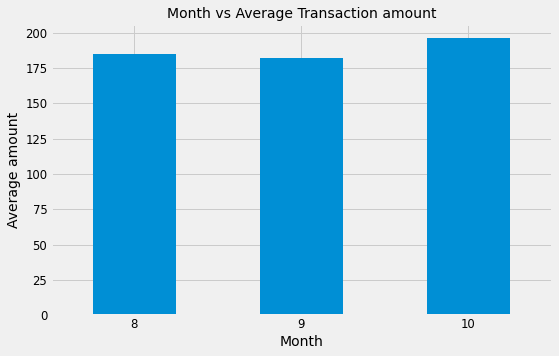

In [38]:
df.groupby('month').amount.mean().plot(kind = 'bar')
plt.title("Month vs Average Transaction amount")
plt.xticks(rotation = 0)
plt.xlabel("Month")
plt.ylabel("Average amount")

In [39]:
df.groupby('day').amount.mean()

day
1     205.707851
2     131.045951
3     243.650352
4     151.307662
5     161.958177
6     222.256325
7     213.269353
8     172.960110
9     154.964686
10    234.108200
11    125.061193
12    193.681117
13    162.376532
14    183.398389
15    246.808956
16    132.636273
17    244.310067
18    185.537597
19    189.912594
20    245.790352
21    173.960803
22    169.726441
23    187.899448
24    263.765185
25    129.846649
26    219.036043
27    150.557384
28    154.467438
29    205.726505
30    144.293009
31    198.148776
Name: amount, dtype: float64

Text(0, 0.5, 'Average amount')

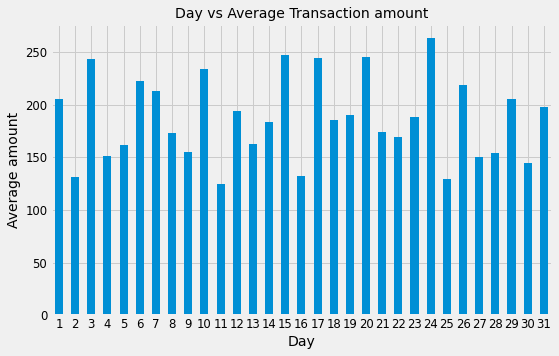

In [40]:
df.groupby('day').amount.mean().plot(kind = 'bar')
plt.title("Day vs Average Transaction amount")
plt.xticks(rotation = 0)
plt.xlabel("Day")
plt.ylabel("Average amount")

In [41]:
df.groupby('day_of_week').amount.mean()

day_of_week
Friday       249.353517
Monday       373.221000
Saturday      54.419286
Sunday        53.015845
Thursday     184.010422
Tuesday      221.576456
Wednesday    195.215570
Name: amount, dtype: float64

Text(0, 0.5, 'Average amount')

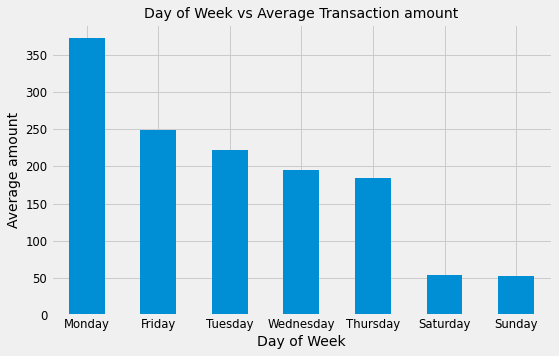

In [68]:
df.groupby('day_of_week').amount.mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title("Day of Week vs Average Transaction amount")
plt.xticks(rotation = 0)
plt.xlabel("Day of Week")
plt.ylabel("Average amount")

### Date with Balance

In [43]:
df.groupby('month').balance.mean()

month
8     10794.148620
9     14730.151136
10    18450.991566
Name: balance, dtype: float64

Text(0, 0.5, 'Average balance')

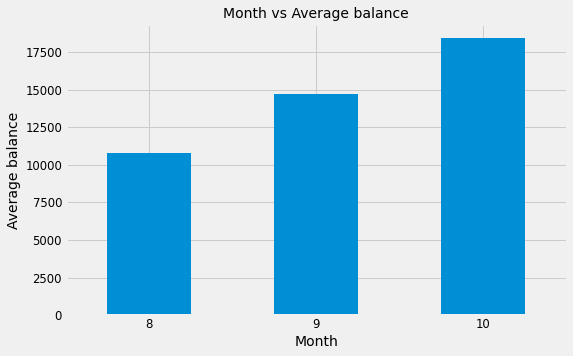

In [44]:
df.groupby('month').balance.mean().plot(kind = 'bar')
plt.title("Month vs Average balance")
plt.xticks(rotation = 0)
plt.xlabel("Month")
plt.ylabel("Average balance")

In [45]:
df.groupby('day').balance.mean()

day
1     13348.643873
2     14193.141580
3     14621.364460
4     11635.607786
5     15049.516355
6     15720.615617
7     14256.137251
8     13193.089096
9     15613.642984
10    12550.207475
11    14858.295508
12    12999.736529
13    15457.475266
14    14662.660769
15    15747.301149
16    18171.363364
17    13698.370045
18    13890.271748
19    15337.867123
20    17543.720136
21    13356.566058
22    11693.559599
23    13918.434751
24    15305.272370
25    17464.437371
26    14325.838460
27    19027.567897
28    14346.348921
29    17259.325968
30    15241.883894
31    12993.495612
Name: balance, dtype: float64

Text(0, 0.5, 'Average balance')

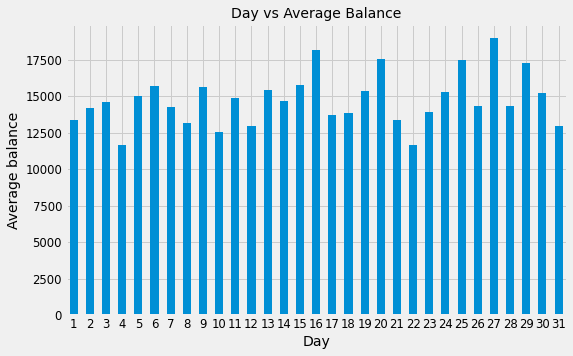

In [46]:
df.groupby('day').balance.mean().plot(kind = 'bar')
plt.title("Day vs Average Balance")
plt.xticks(rotation = 0)
plt.xlabel("Day")
plt.ylabel("Average balance")

In [47]:
df.groupby('day_of_week').balance.mean()

day_of_week
Friday       13669.240164
Monday       15414.475029
Saturday     15367.523019
Sunday       13638.446710
Thursday     16879.305541
Tuesday      14766.759361
Wednesday    13583.187814
Name: balance, dtype: float64

Text(0, 0.5, 'Average balance')

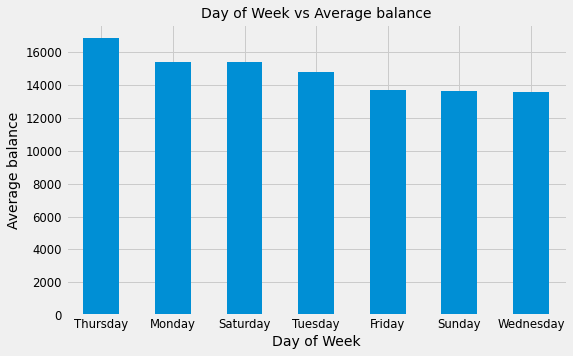

In [69]:
df.groupby('day_of_week').balance.mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title("Day of Week vs Average balance")
plt.xticks(rotation = 0)
plt.xlabel("Day of Week")
plt.ylabel("Average balance")

In [49]:
df.head()

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,binned_age,month,day,day_of_week
0,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,"(20, 40]",8,1,Wednesday
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,"(20, 40]",8,1,Wednesday
2,authorized,1.0,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,"(20, 40]",8,1,Wednesday
3,authorized,1.0,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,"(20, 40]",8,1,Wednesday
4,authorized,1.0,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,"(20, 40]",8,1,Wednesday


In [50]:
df.groupby('merchant_long_lat')['amount'].mean()

merchant_long_lat
113.83 -22.76    36.256667
114.16 -27.71    24.840000
114.17 -27.7     39.440000
114.17 -27.71    11.773333
114.57 -26.7     45.950000
                   ...    
153.58 -28.28    58.310000
153.59 -28.79    17.715000
153.6 -28.63     14.100000
153.6 -28.65      9.470000
153.61 -28.64    11.230000
Name: amount, Length: 2703, dtype: float64

In [51]:
df.groupby(['lat','long'])['amount'].mean()

lat      long  
-573.00  255.00    268.989837
-42.88   147.31    120.311591
-38.03   145.35    254.994615
-37.97   147.08    154.711842
-37.95   145.06    226.721184
                      ...    
-21.15   149.19    392.840811
-17.03   145.73    108.334459
-12.49   130.98    693.632903
-12.45   130.84    168.607423
-12.37   130.90    210.277299
Name: amount, Length: 100, dtype: float64

In [52]:
token  = 'pk.eyJ1IjoiamFnYW5zaW5naDkzIiwiYSI6ImNraW1tOW1tbDBlNmIzOHFxODh5b21kamYifQ.xnU6fZzdpli0Oh3NgZ3-Aw'

In [90]:
import plotly.graph_objects as go

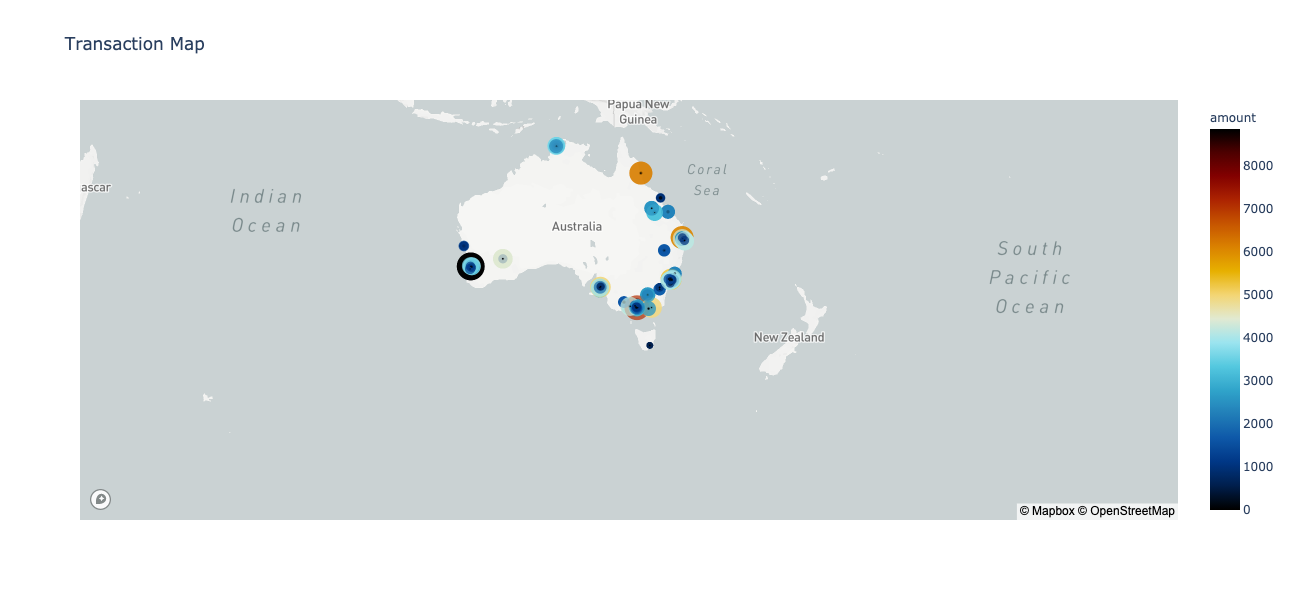

In [100]:
px.set_mapbox_access_token(token)

fig = px.scatter_mapbox(df, lat = 'lat', lon = 'long',
                  color = "amount", size = "amount",
                  color_continuous_scale=px.colors.cyclical.IceFire,
                  hover_data = ["lat", "long"],
                  size_max = 20, zoom = 2, hover_name = "amount",
                       width = 1000, height = 600, title = "Transaction Map")
fig.show()

### There is one transaction with wrong lat long

In [54]:
df.country.value_counts()

Australia    12043
Name: country, dtype: int64

In [55]:
df.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'long', 'lat', 'binned_age', 'month', 'day', 'day_of_week'],
      dtype='object')

Text(0, 0.5, 'Number of Transactions')

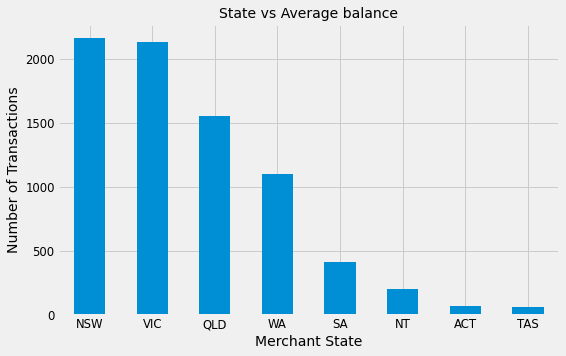

In [102]:
df.groupby('merchant_state').amount.count().sort_values(ascending = False).plot(kind = 'bar')
plt.title("State vs Number of Tranactions")
plt.xticks(rotation = 0)
plt.xlabel("Merchant State")
plt.ylabel("Number of Transactions")

Text(0, 0.5, 'Average amount')

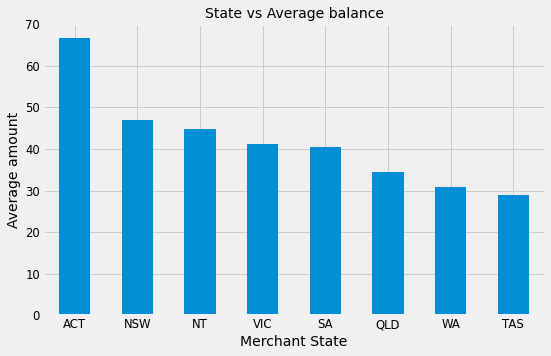

In [70]:
df.groupby('merchant_state').amount.mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title("State vs Average balance")
plt.xticks(rotation = 0)
plt.xlabel("Merchant State")
plt.ylabel("Average amount")